In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


###  **TO DO**
Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 

In [3]:
fuel_econ['fuel'] = fuel_econ['fuelType'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,fuel
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Premium
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Premium
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Premium
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Premium
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Regular


In [51]:
fuel_econ['fuel']

0       Premium
1       Premium
2       Premium
3       Premium
4       Regular
         ...   
3924    Regular
3925    Regular
3926    Regular
3927    Premium
3928    Premium
Name: fuel, Length: 3929, dtype: object

In [62]:
ct_counts = fuel_econ.groupby(['VClass', 'fuel']).size()
ct_counts

VClass            fuel    
Compact Cars      Diesel       36
                  Natural       3
                  Premium     593
                  Regular     490
Large Cars        Diesel        5
                  Midgrade     16
                  Premium     348
                  Regular     256
Midsize Cars      Diesel       32
                  Midgrade      7
                  Premium     509
                  Regular     640
Minicompact Cars  Premium     318
                  Regular       3
Subcompact Cars   Diesel        7
                  Premium     534
                  Regular     132
dtype: int64

In [63]:
ct_counts = ct_counts.reset_index(name='count')


In [64]:
ct_counts

,VClass,fuel,count
0,Compact Cars,Diesel,36
1,Compact Cars,Natural,3
2,Compact Cars,Premium,593
3,Compact Cars,Regular,490
4,Large Cars,Diesel,5
5,Large Cars,Midgrade,16
6,Large Cars,Premium,348
7,Large Cars,Regular,256
8,Midsize Cars,Diesel,32
9,Midsize Cars,Midgrade,7


In [65]:
ct_counts.drop(ct_counts[(ct_counts['fuel'] != 'Premium') & (ct_counts['fuel'] != 'Regular')].index, inplace=True)

In [66]:
ct_counts

,VClass,fuel,count
2,Compact Cars,Premium,593
3,Compact Cars,Regular,490
6,Large Cars,Premium,348
7,Large Cars,Regular,256
10,Midsize Cars,Premium,509
11,Midsize Cars,Regular,640
12,Minicompact Cars,Premium,318
13,Minicompact Cars,Regular,3
15,Subcompact Cars,Premium,534
16,Subcompact Cars,Regular,132


In [68]:
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'fuel', values = 'count')

In [58]:
ct_counts

fuel,Premium,Regular
VClass,,
Compact Cars,593,490
Large Cars,348,256
Midsize Cars,509,640
Minicompact Cars,318,3
Subcompact Cars,534,132


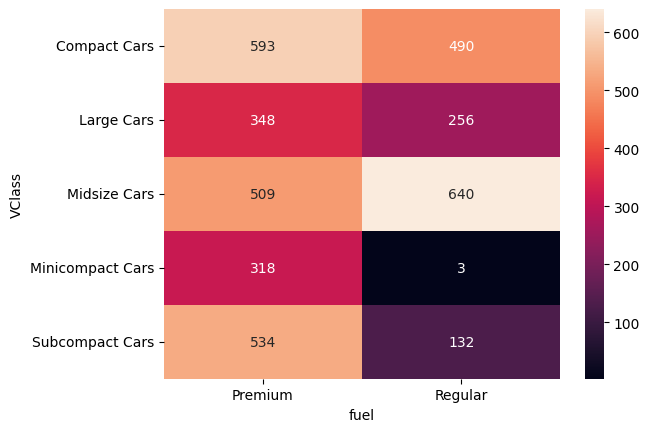

In [59]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');